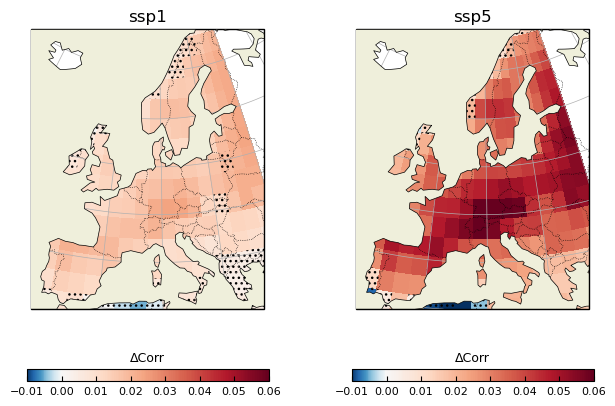

In [14]:
fig = plt.figure(figsize=(7,4.5))
for i in 1:2
    ax = plt.subplot(1,2,i, projection=proj3)
    title(tlts[i])
    ax.gridlines(linewidth=.5)
    ax.add_feature(cfeature.BORDERS, linewidth=.5, linestyle=":") 
    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor="k", lw=.5, facecolor=cfeature.COLORS["land"]) 
    wrap_data, wrap_lon = cput.add_cyclic_point(corDifs[i]', coord=lon, axis=1)
    
    vmin, vmax = -0.01, 0.06
    norm = clrs.DivergingNorm(vmin=vmin, vcenter=0, vmax=vmax)
    p = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="RdBu_r", norm=norm)
    ax.pcolor(lon, lat, corAgr[i], transform=proj1, alpha=0., hatch="...") 
    
    cbar = plt.colorbar(p, shrink=0.7, orientation="horizontal") 
    cbar.ax.set_title("ΔCorr", size=9)
    cbar.ax.tick_params(direction="in", labelsize=8)
end
plt.tight_layout()

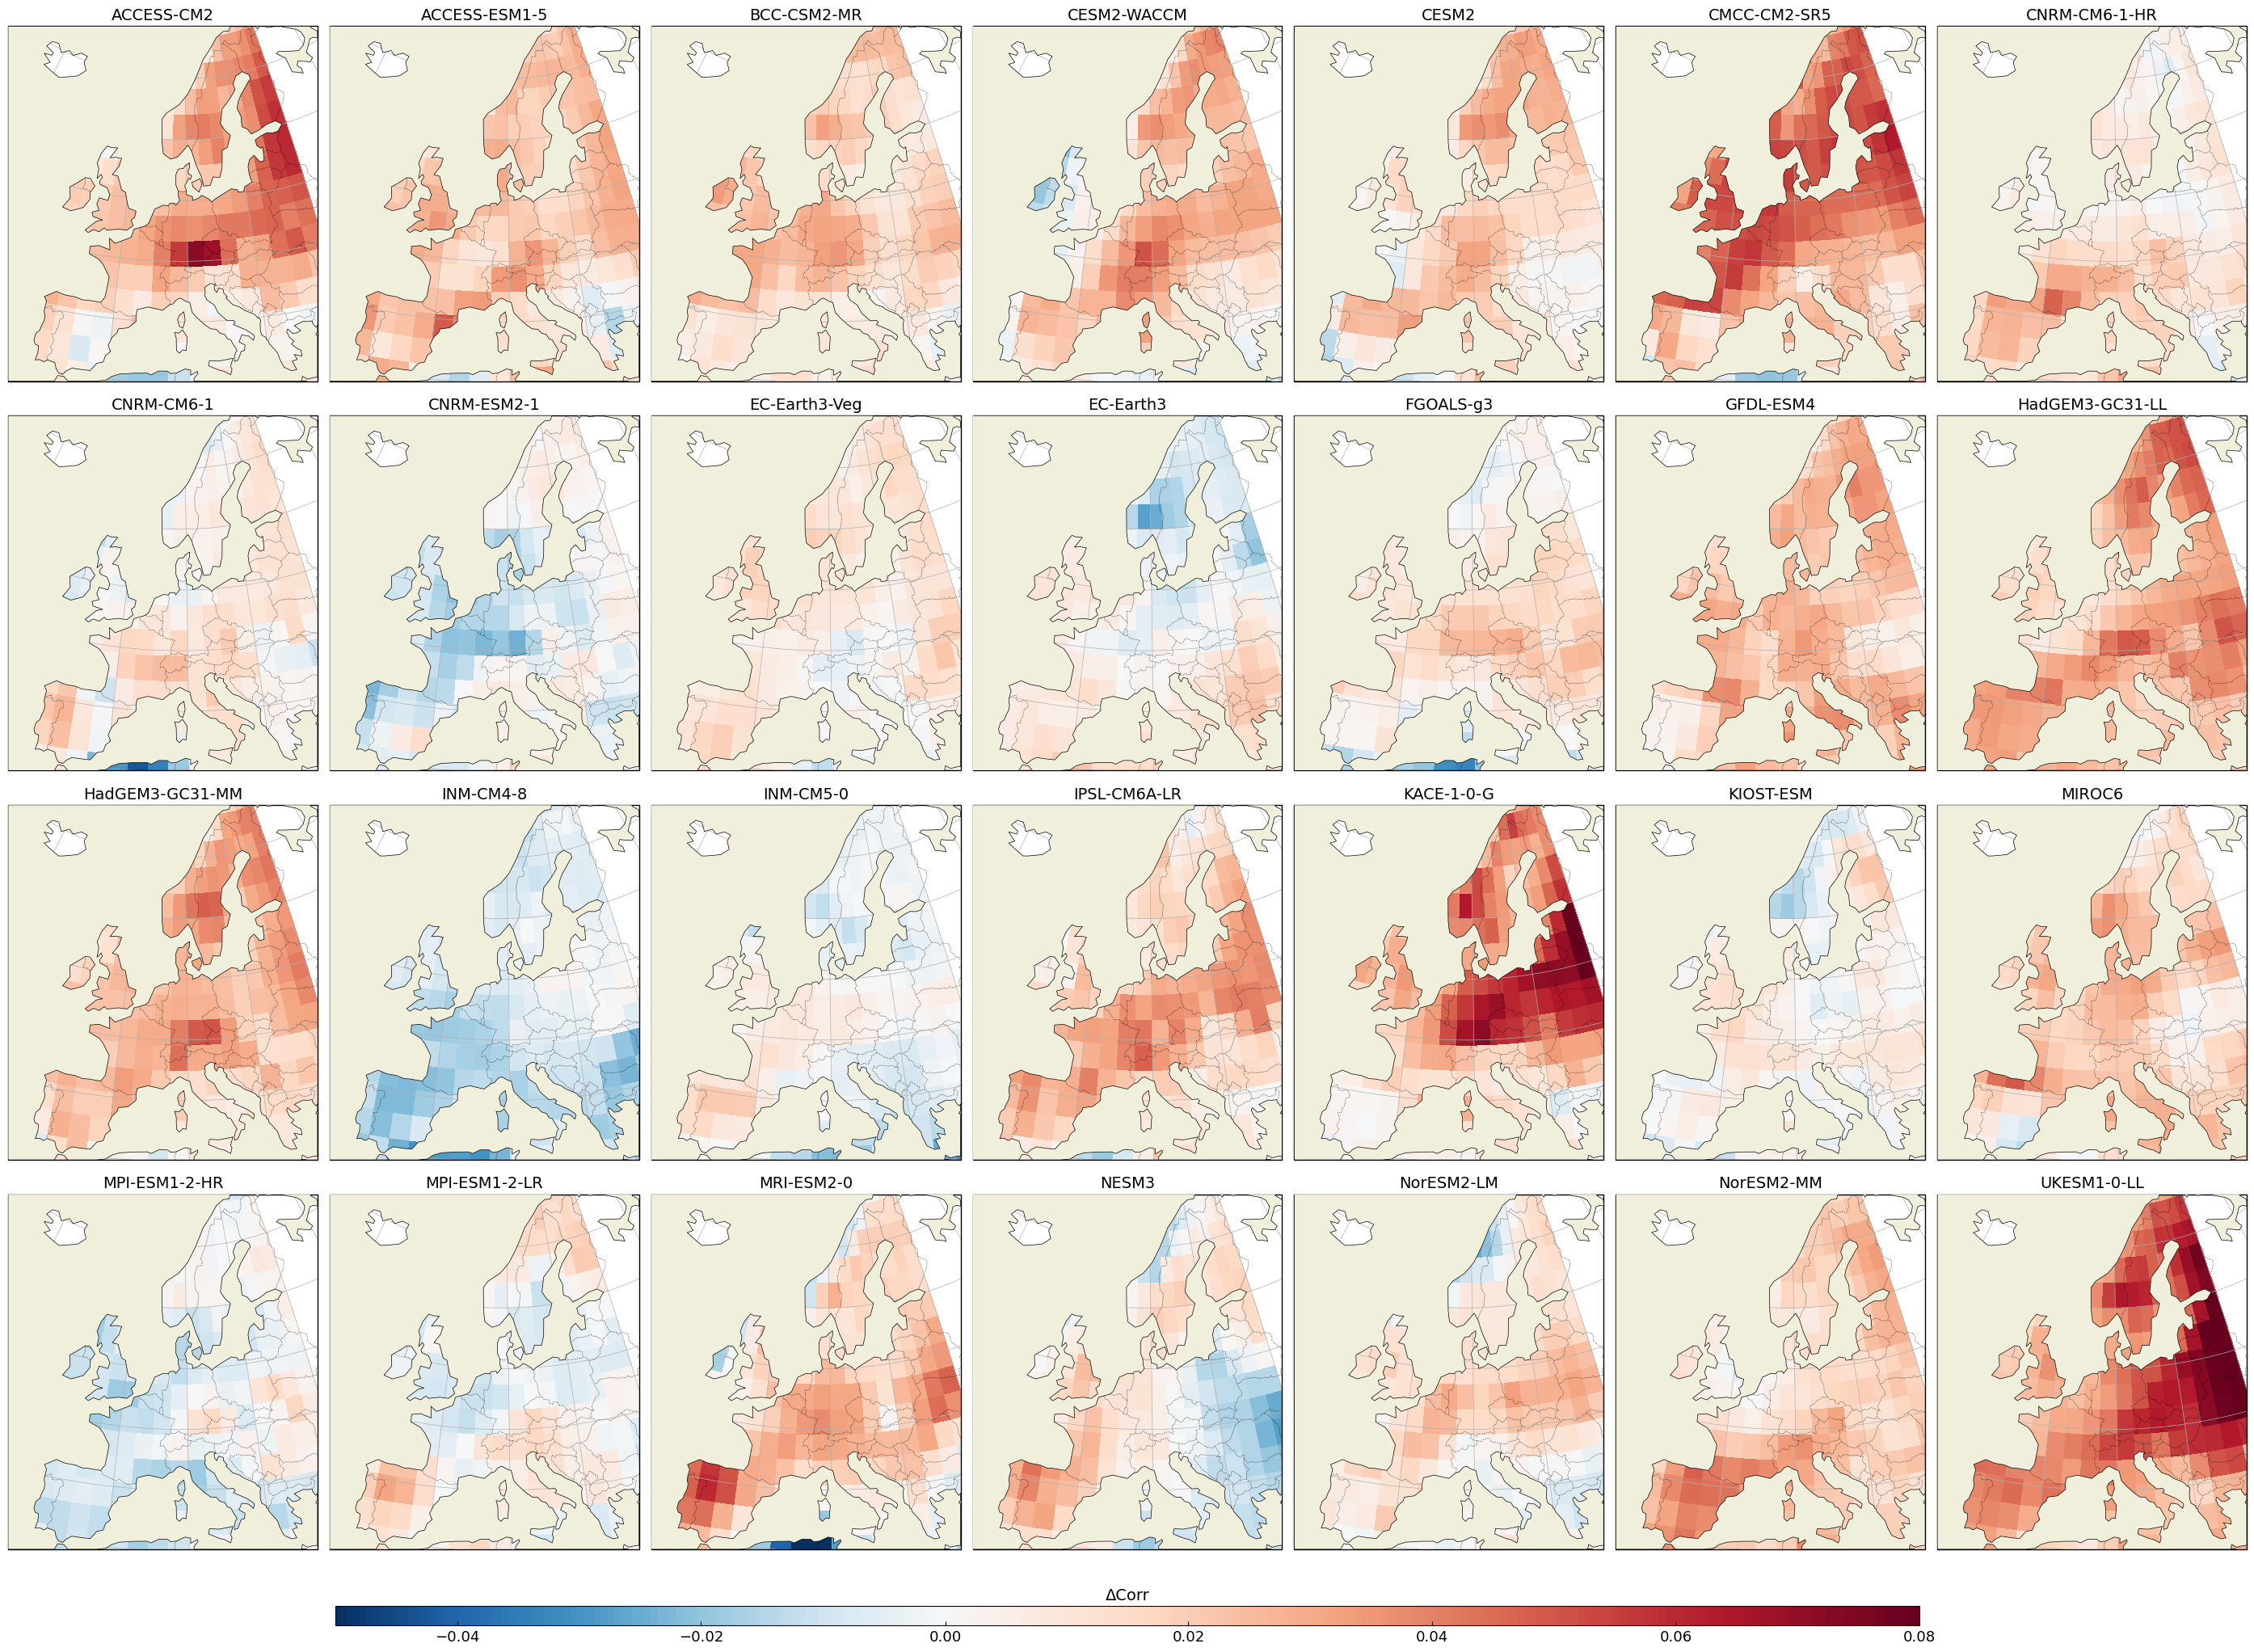

In [17]:
fig = plt.figure(figsize=(28,24)) 
for m in 1:28
    ax = plt.subplot(4,7, m, projection=proj3)
    ax.set_title(mdls[m], size=14)
    ax.gridlines(linewidth=.5)
    ax.add_feature(cfeature.BORDERS, linewidth=.5, linestyle=":") 
    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor="k", lw=.5, facecolor=cfeature.COLORS["land"]) 
    
    wrap_data, wrap_lon = cput.add_cyclic_point(cor1dif[:,:,m]', coord=lon, axis=1)
    vmin, vmax = -0.05, 0.08
    norm = clrs.DivergingNorm(vmin=vmin, vcenter=0, vmax=vmax)
    global md1 = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="RdBu_r", norm=norm)
end
plt.tight_layout()
fig.subplots_adjust(bottom=0.17)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.01])
fig.colorbar(md1, cax=cbar_ax, orientation="horizontal")
cbar_ax.set_title("ΔCorr", size=14)
cbar_ax.tick_params(direction="in", labelsize=13)

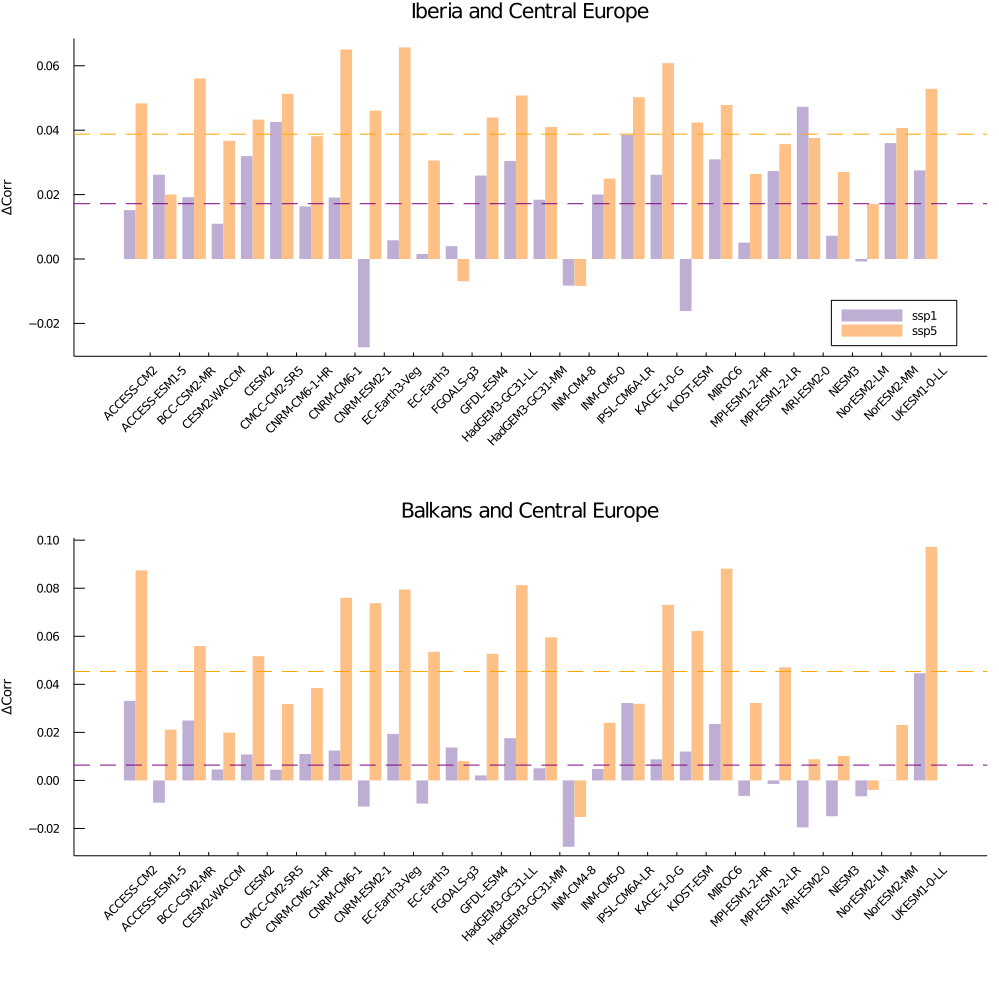

In [29]:
l = @layout [a; b]
Plots.plot(p1, p2, layout=l, size=(1000,1000))

#### Absolute change

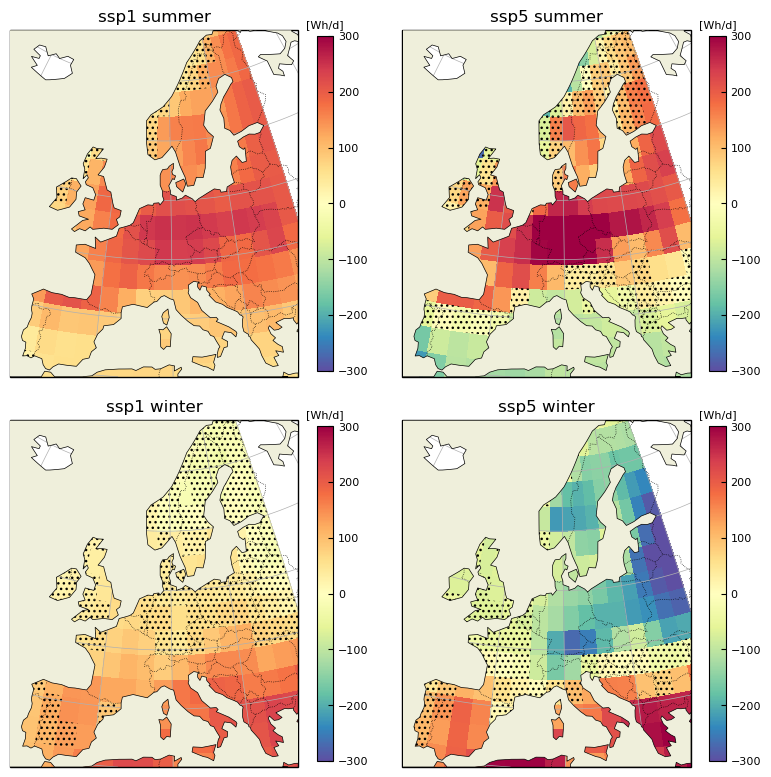

In [15]:
fig = plt.figure(figsize=(8,8))
for i=1:4
    ax = plt.subplot(2,2,i, projection=proj3)
    title(tltsSeas[i])
    ax.gridlines(linewidth=.5)
    ax.add_feature(cfeature.BORDERS, linewidth=.5, linestyle=":") 
    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor="k", lw=.5, facecolor=cfeature.COLORS["land"])     
    wrap_data, wrap_lon = cput.add_cyclic_point(pvChSeasMn[i]', coord=lon, axis=1)
    wrap_agr, wrap_lon = cput.add_cyclic_point(pvChSeasAgr[i], coord=lon, axis=1)  
    p = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="Spectral_r", vmin=-300, vmax=300) 
    ax.pcolor(wrap_lon, lat, wrap_agr, transform=proj1, alpha=0., hatch="...") 

    cbar = plt.colorbar(p, shrink=0.92) 
    cbar.ax.set_title("[Wh/d]", size=8)
    cbar.ax.tick_params(direction="in", labelsize=8)
end
plt.tight_layout()

#### Relative change

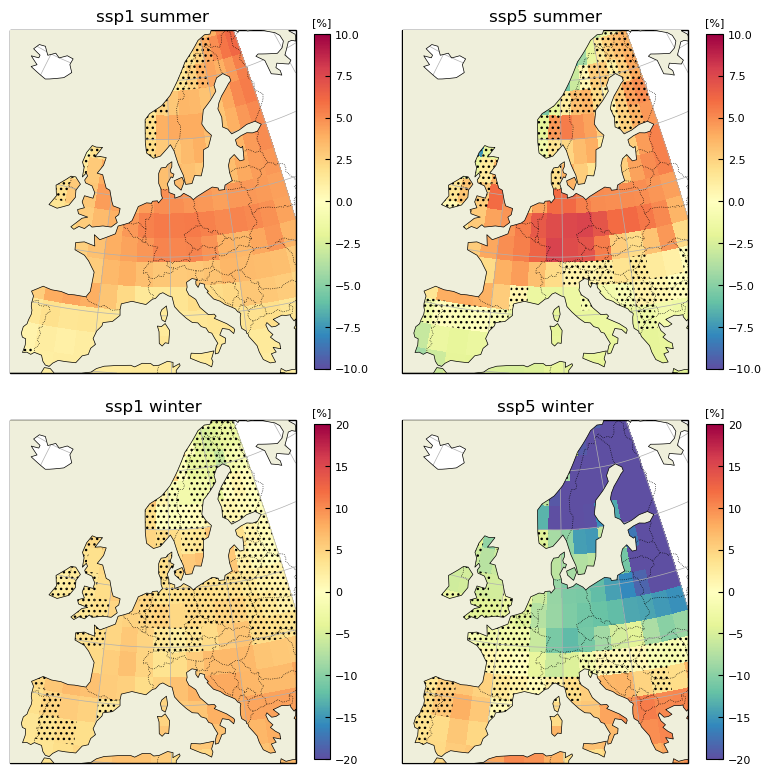

In [17]:
fig = plt.figure(figsize=(8,8))
for i=1:4
    ax = plt.subplot(2,2,i, projection=proj3)
    title(tltsSeas[i])
    ax.gridlines(linewidth=.5)
    ax.add_feature(cfeature.BORDERS, linewidth=.5, linestyle=":") 
    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor="k", lw=.5, facecolor=cfeature.COLORS["land"])     
    wrap_data, wrap_lon = cput.add_cyclic_point(pvChSeasPerMn[i]', coord=lon, axis=1)
    wrap_agr, wrap_lon = cput.add_cyclic_point(pvChSeasPerAgr[i], coord=lon, axis=1)  
    i <= 2 ?
        (vmin,vmax) = (-10,10) : (vmin,vmax) = (-20,20)
    p = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="Spectral_r", vmin=vmin, vmax=vmax)
    ax.pcolor(wrap_lon, lat, wrap_agr, transform=proj1, alpha=0., hatch="...") 

    cbar = plt.colorbar(p, shrink=0.92) 
    cbar.ax.set_title("[%]", size=8)
    cbar.ax.tick_params(direction="in", labelsize=8)
end
plt.tight_layout()